# R kernel

In [9]:
suppressMessages({
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggpubr)
library(cowplot)
library(gridExtra)
library(rstatix)
library(reshape2)
library(ggnewscale)
library(RColorBrewer)
library(ComplexHeatmap)
library(SeuratDisk)
library(Seurat)
library(monocle)
library(CellChat)
})

In [10]:
mytheme = function(){
theme_bw() +
theme(axis.text.x=element_text(size=6,color='black'),
    axis.text.y=element_text(size=6,color="black"),
    axis.title.y=element_text(size=6,color="black"),
    axis.title.x=element_text(size=6,color="black"),
    #axis.ticks.x=element_blank(),
    axis.ticks.length=unit(.02, "in"),
    axis.line = element_line(color = "black", linewidth = 0.25),
    axis.ticks = element_line(color = "black", linewidth = 0.25),
    strip.text.x = element_text(size = 6,margin = margin(0.1,0,0.1,0, "cm")),
    strip.text.y = element_text(size = 6,margin = margin(0,0.1,0,0.1, "cm")),
    strip.background=element_rect(linewidth=0.25),
    legend.text=element_text(size=6,color="black"),
    legend.title=element_text(size=6,color="black"),
    legend.key.width=unit(0.2,'cm'),
    legend.key.height=unit(0.2,'cm'),
    legend.box.margin=margin(0,0,0,2),
    legend.box.spacing = unit(0, "pt"),
    panel.spacing = unit(0.1, "cm"),
    plot.title = element_text(size=5),
    #panel.border = element_rect(size=0.25,color="black"),
    panel.grid = element_blank()
)
}

In [14]:
groups <- c("HC","DLE","SLE")

## Fig.S6C

In [5]:
monocle_rds = readRDS("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/KC/monocle/KC_monocle_fc0.5_root.rds")

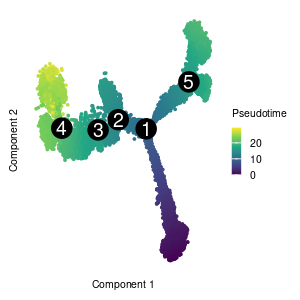

In [9]:
p1 = plot_cell_trajectory(monocle_rds,color_by='Pseudotime',cell_size = 0.01, cell_link_size =0.25,show_backbone = TRUE, backbone_color = "black") +
    scale_color_viridis_c(option = "viridis") +
    mytheme() +
    theme(axis.text.x = element_blank(),
          axis.text.y = element_blank(),
          axis.title=element_blank(),
          axis.line=element_blank(),
         axis.ticks=element_blank(),
        panel.border = element_blank())
options(repr.plot.width =2.5,repr.plot.height =2.5)
p1

## Fig.S6D

In [12]:
KC_celltype_colors = c(
    "Granular KC" = "#0089A3",
    "Spinous KC-1" = "#FF0000FF",
    "Spinous KC-2" = "#FF7F0EFF",
    "Spinous KC-3" = "#CCFF00FF",
    "Spinous KC-4" = "#EEC3FF",
    "Basal KC" = "#2CA02CFF",
    "IRS" = "#99CCFFFF",
    "ORS" = "#CC33FFFF",
    "OB" = "#FFCC00FF",
    "HF-SG" = "#FFFF00FF",
    "Channel KC" = "#A77500",
    "Stress KC" = "#00FFFFFF",
    "Cycling KC" = "#FF00CCFF"
)

Picking joint bandwidth of 0.958



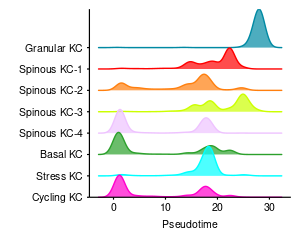

In [12]:
data = monocle_rds@phenoData@data
data$subtype = factor(data$subtype, levels=rev(names(KC_celltype_colors)))

plot = ggplot(data, aes(x=Pseudotime, y =subtype, fill=subtype, color=subtype)) + 
ggridges::geom_density_ridges(alpha=0.7, size=0.3) +
scale_fill_manual(values=KC_celltype_colors) +
scale_color_manual(values=KC_celltype_colors) +
scale_y_discrete(expand = c(0, 0)) +
labs(y='') +
mytheme() +
theme(legend.position = 'none',
      panel.border = element_blank())

options(repr.plot.width =2.5,repr.plot.height =2)
plot

## Fig.S6E

In [3]:
subtype_desity = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Tissue_line/Cell_density_subtype.csv",head=T, check.names = F)

In [4]:
subtype_desity = subset(subtype_desity, subtype == 'Stress KC')
subtype_desity$Location = factor(subtype_desity$Location, levels = c('All','Epi','Der'))
subtype_desity$group = factor(subtype_desity$group, levels = c('HC','DLE','SLE'))

In [7]:
test_result = subtype_desity %>%
  as.data.frame() %>%
  setNames(make.names(names(.), TRUE)) %>%
  group_by(Location) %>%
  dunn_test(cell_density_mm2 ~ group)
test_result$p.format = sprintf("%.3f", test_result$p.adj)
test_result <- test_result %>% mutate(y.position = c(580, 680, 780,580, 680, 780, 580, 680, 780))

png 
  2

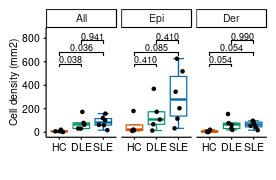

In [81]:
plot = ggplot(subtype_desity, aes(x=group,y=cell_density_mm2,color=group)) +
stat_boxplot( geom = "errorbar", width=0.5, linewidth=0.25) +
geom_boxplot(outlier.shape = NA,size=0.25) +
geom_jitter(size=1,width=0.2,color='black',alpha=1,shape=19, stroke=NA) +
facet_wrap(.~Location) +
#stat_compare_means(comparisons=list(c('HC','DLE'),c('HC','SLE'),c('DLE','SLE')), size=1.7, label.y = c(550,640,730), bracket.size=0.2, label = 'p.signif', method='wilcox.test') + 
stat_pvalue_manual(test_result, label = "p.format", label.size=1.8, bracket.size=0.25, tip.length = 0.03) +
labs(x="",y='Cell density (mm2)') +
scale_y_continuous(limits = c(0,850)) +
scale_color_manual(values=group_color) +
mytheme() + 
theme(legend.position = 'none',    
    #strip.text.x = element_text(size = 5,margin = margin(0.1,0,0.1,0, "cm")), 
    strip.text.x = element_text(size = 6,margin = margin(0.07,0,0.07,0, "cm")), 
    strip.background=element_rect(linewidth=0.25, color='black', fill="white"),
    panel.border = element_blank()
)

options(repr.plot.width =2.3,repr.plot.height =1.5)
plot

pdf("../../figures/Stress_KC_density_group.pdf",w=2.3,h=1.5)
plot
dev.off()

## Fig.S6F

In [45]:
cell_des = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Tissue_line/Cell_density_subtype.csv",head=T)
cell_des$group = ifelse(grepl("DLE",cell_des$sample),"DLE",
                        ifelse(grepl("SLE",cell_des$sample),"SLE",'HC'))

In [41]:
CLASI = read.table("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/RCLASI_all_sample.xls",head=T, sep="\t",comment.char = "#")

In [74]:
subtype_rate = cell_des[cell_des$subtype=='Stress KC' & cell_des$group=='SLE',]
merge = merge(subtype_rate, CLASI[,c('sample','CLASI_activity','CLASI_damage')], by='sample')
merge$Location = factor(merge$Location, levels = c("All","Epi","Der"))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


png 
  2

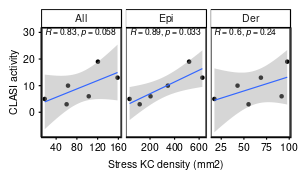

In [83]:
plot = ggplot(merge, aes(x=cell_density_mm2, y=CLASI_activity, group=subtype)) + 
    geom_point(shape=19, stroke=NA, size=1) +
    geom_smooth(method=lm, lwd=0.25) +
    stat_cor(label.y = 30,size=1.7, method='spearman') +
    facet_wrap(.~Location,ncol=3, scale='free_x') +
    labs(x='Stress KC density (mm2)', y = 'CLASI activity') + 
    mytheme() +
    theme(strip.background=element_rect(size=0.25, color='black', fill="white"),
          strip.text.x = element_text(size = 6,margin = margin(0.07,0,0.07,0, "cm")),
     )

options(repr.plot.width= 2.5,repr.plot.height = 1.5)
plot

pdf("../../figures/Stress_KC_density_corr2activity.pdf", w=2.5,h=1.3)
plot
dev.off()

## Fig.S6G

In [88]:
source_celltype = c("Granular KC","Spinous KC-1","Spinous KC-2","Spinous KC-3","Spinous KC-4","Basal KC",
                      "IRS","ORS","OB", "HF-SG","Channel KC","Stress KC","Cycling KC")
target_celltype = c('T cells', 'NK cells', 'B cells', 'Plasma cells', 'Macrophage/DC', 'Mast cells') 

In [89]:
merge_data = data.frame()
for (i in 1:length(groups))
{
    cellchat <- readRDS(paste0("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/KC/Cellchat/KC_Immu_",groups[i],".rds"))
    data= netVisual_bubble(cellchat,return.data=T, signaling = c('CXCL'),sources.use=source_celltype,targets.use=target_celltype)
    data = data$communication
    data$group <- groups[i]
    merge_data <- rbind(merge_data, data) 
}

Comparing communications on a single object 


Comparing communications on a single object 


Comparing communications on a single object 




In [90]:
merge_data = merge_data[complete.cases(merge_data), ]
#merge_data = merge_data[merge_data$source %in% source_celltype,]
#merge_data = merge_data[merge_data$target %in% target_celltype,]
merge_data$source = factor(merge_data$source, levels=source_celltype)
merge_data$target = factor(merge_data$target, levels=target_celltype)
merge_data$source.target = paste0(merge_data$source, " -> ", merge_data$targe)
merge_data$ligand.receptor = paste0(merge_data$ligand, ' - ', merge_data$receptor)
merge_data$group = factor(merge_data$group, levels=c('HC','DLE','SLE'))

In [91]:
merge_data$ligand.receptor = factor(merge_data$ligand.receptor, levels = rev(c("CXCL9 - CXCR3", "CXCL10 - CXCR3", "CXCL11 - CXCR3", "CXCL16 - CXCR6")))

png 
  2

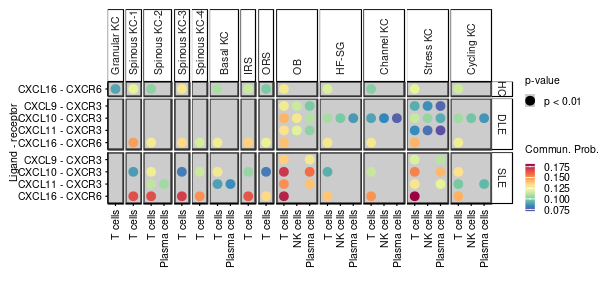

In [98]:
myPalette = rev(brewer.pal(n = 10, name = "Spectral"))

p <- ggplot(merge_data,aes(x=target, y=ligand.receptor, color=prob, size = pval)) +
geom_point(shape=19) +
labs(y="Ligand - receptor", x="", color="Commun. Prob.", size="p-value") +
scale_size(range=c(1, 2), breaks=c(3),labels=c("p < 0.01"),guide="legend") + 
facet_grid(group~source, scales="free",space = 'free') +
scale_color_gradientn(colours = myPalette) +
mytheme() +
theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5),
    axis.text.y=element_text(size=6),
    strip.text.x = element_text(size = 6, angle=90, hjust= 0, margin = margin(0.15,0,0.15,0, "cm")),
    strip.background=element_rect(linewidth=0.25, color='black', fill="white"),
    panel.background=element_rect(fill='gray80'),
    panel.spacing = unit(0.05, "cm")
     )
options(repr.plot.width =5.1,repr.plot.height =2.4)
p
pdf("../../figures/KC_Immu_Cellchat_dotplot.pdf",w=5.1,h=2.4)
p
dev.off()

## Fig.S6H

In [28]:
SC_rds = readRDS("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/SC_data/SC_anno/scRNA_harmony_subtype_20240823.rds")
SC_rds$celltype = as.character(SC_rds$celltype)
SC_rds$subtype = as.character(SC_rds$subtype)
celltype_need = c('Keratinocytes', 'T cells', 'NK cells', 'B cells', 'Plasma cells', 'Macrophage/DC', 'Mast cells')
KC_Immu_rds = subset(SC_rds, celltype %in% celltype_need)
KC_Immu_rds$type = ifelse(KC_Immu_rds$celltype == "Keratinocytes", KC_Immu_rds$subtype, KC_Immu_rds$celltype)

In [29]:
KC_Immu_rds$type = factor(KC_Immu_rds$type, levels = rev(c(KC_celltype_order, 'T cells', 'NK cells', 'B cells', 'Plasma cells', 'Macrophage/DC', 'Mast cells')))

In [19]:
gene <- c("CXCL9","CXCL10","CXCL11",'CXCL16','CXCR3','CCR6')

In [31]:
plot_data_merge = data.frame()

samples <- c("HC","DLE","SLE")
for(i in (1:length(samples))){
    sub <- subset(KC_Immu_rds,groups==samples[i])
    plot_data = DotPlot(sub, features=gene,assay='RNA', group.by='type')$data
    plot_data$group = samples[i]
    plot_data_merge = rbind(plot_data_merge, plot_data)
}

In [34]:
KC_subtype = c("Granular KC","Spinous KC-1","Spinous KC-2","Spinous KC-3","Spinous KC-4","Basal KC",
                      "IRS","ORS","OB", "HF-SG","Channel KC","Stress KC","Cycling KC")
celltype_order = c(KC_subtype, 'T cells', 'NK cells', 'B cells', 'Plasma cells', 'Macrophage/DC', 'Mast cells')

plot_data_merge$group = factor(plot_data_merge$group, levels=groups)
plot_data_merge$id = factor(plot_data_merge$id, levels=rev(celltype_order))

png 
  2

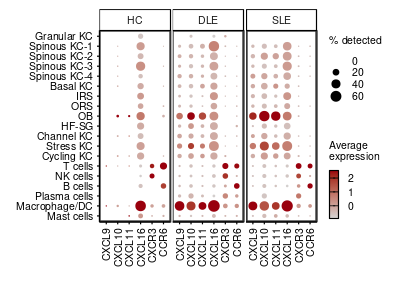

In [40]:
plot <- ggplot(plot_data_merge,aes(x=features.plot,y =  id,size = pct.exp, color = avg.exp.scaled))+
    geom_point(shape=19, stroke=NA)+
    scale_size("% detected", range = c(0,3)) +
    scale_color_gradient(low = "lightgrey",high = "#99000D",guide = guide_colorbar(ticks.colour = "black",theme = theme(legend.frame = element_rect(colour = "black", linewidth=0.25))),name = "Average\nexpression")+
    facet_grid(~group, scales="free_x",space = "free") + 
    labs(x="",y="") +
    theme_bw() +
    mytheme() +
    theme(axis.text.x=element_text(size=6, angle=90, hjust=1,vjust=0.5),
        strip.background=element_rect(linewidth=0.25, color='black', fill="white"),
         panel.spacing = unit(0.05, "cm"))

options(repr.plot.width = 3.3,repr.plot.height =2.4)
plot
pdf('../../figures/KC_Immu_CXCL_CXCR_expr_dotplot.pdf',w=3.3,h=2.4)
plot
dev.off()

## Fig.S6I

In [15]:
KC_subtype_T_dist = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/KC/KC_subtype_Tcell_distance.csv",head=T)
KC_subtype_T_dist$type = factor(KC_subtype_T_dist$type, levels=names(KC_celltype_colors))
KC_subtype_T_dist$group = factor(KC_subtype_T_dist$group, levels=groups)

In [16]:
dist_mean = KC_subtype_T_dist %>% 
    group_by(sample,group, type) %>%
    summarise(mean = mean(value),
             sd = sd(value),
             sem = sd/sqrt(n()))

`summarise()` has grouped output by 'sample', 'group'. You can override using
the `.groups` argument.


In [17]:
stat.test = dist_mean %>%
  as.data.frame() %>%
  setNames(make.names(names(.), TRUE)) %>%
  group_by(type) %>%
  dunn_test(mean ~ group)
stat.test$p.format = sprintf("%.3f", stat.test$p.adj)
stat.test <- stat.test %>% add_xy_position(x='type',dodge=0.8)

stat.test <- stat.test %>%
  mutate(y.position = case_when(
    group1 == "HC" & group2 == "DLE" ~ 1100,  # HC vs DLE 的 y 位置
    group1 == "HC" & group2 == "SLE" ~ 1250,  # HC vs SLE 的 y 位置
    group1 == "DLE" & group2 == "SLE" ~ 1200   # DLE vs SLE 的 y 位置
  ))

In [18]:
background_colors <- c("lightgray", "white","lightgray", "white","lightgray", "white","lightgray", "white","lightgray", "white","lightgray", "white","lightgray")

celltype_bg <- data.frame(
  type = levels(dist_mean$type),
  ymin = -Inf,
  ymax = Inf,
  xmin = 1:length(unique(dist_mean$type)) - 0.5,
  xmax = 1:length(unique(dist_mean$type)) + 0.5,
  bg_color = background_colors
)

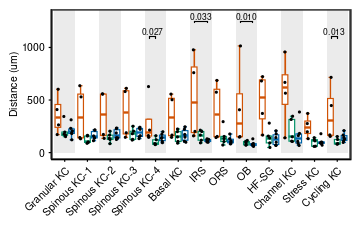

In [20]:
plot = ggplot() +
    geom_col(data = celltype_bg, aes(x=type, y=Inf, fill = bg_color), alpha = 0.3) +
    scale_fill_manual(values = c('gray' , 'white'),name=NULL)+
    new_scale_fill()+
    stat_boxplot(data = dist_mean, aes(x=type,y=mean,color=group), geom = "errorbar", width=0.5, linewidth=0.25, position=position_dodge(0.9)) +
    geom_boxplot(data = dist_mean, aes(x=type,y=mean,color=group), outlier.shape = NA,size=0.25, position=position_dodge(0.9)) + 
    geom_point(data = dist_mean, aes(x = type, y = mean, fill = group), size = 0.6, alpha = 1, shape = 19, stroke = NA, color = 'black',position = position_jitterdodge(jitter.width = 0.2, dodge.width = 0.9)) + 
    stat_pvalue_manual(stat.test,label = "p.format",label.size=1.7, bracket.size=0.25, tip.length = 0.01,hide.ns = TRUE) +
    labs(x="",y='Distance (um)') +
    coord_cartesian(ylim = c(0,1300)) +
    scale_color_manual(values=group_color) +
    mytheme() + 
    theme(axis.text.x = element_text(size=6, color='black', angle=45, hjust=1, vjust=1),
            legend.position = 'none'  
         )

options(repr.plot.width =3,repr.plot.height =2)
plot
# pdf("figures/KC_subtype_T_cells_distance_1.pdf",w=3,h=1.7)
# plot
# dev.off()

## Fig.S6J

In [162]:
KC_apoptosis_score = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/KC/KC_apoptosis_score.csv",head=T)
KC_apoptosis_score$subtype = factor(KC_apoptosis_score$subtype, levels = names(KC_celltype_colors))

png 
  2

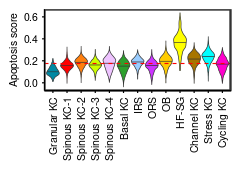

In [166]:
plot = ggplot(KC_apoptosis_score, aes(x=subtype,y=APOPTOSIS_score,fill=subtype)) +
        geom_violin(scale='width', lwd=0.15,draw_quantiles = 0.5) + 
        geom_hline(yintercept = mean(KC_apoptosis_score$APOPTOSIS_score), linewidth = 0.25, linetype = "dashed", color='red') +
        scale_fill_manual(values=KC_celltype_colors) +
        labs(x='',y='Apoptosis score') +
        mytheme() + 
        theme(
            axis.text.y=element_text(size=6,color='black'),
            axis.text.x=element_text(size=6,color='black', angle=90, hjust=1, vjust=0.5),
            legend.position = 'none'
        )

options(repr.plot.width =2,repr.plot.height = 1.5)
plot

pdf("../../figures/SC_KC_apoptosis_score_vlnplot.pdf",w=2, h=1.5)
plot
dev.off()

# Python kernel

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
from shapely.geometry import GeometryCollection, Polygon
import matplotlib.backends.backend_pdf as pdf_backend
import warnings
warnings.filterwarnings('ignore')
import importlib

import utils_20250718
importlib.reload(utils_20250718)
from utils_20250718 import *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
ST_adata = sc.read_h5ad('/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Cellbin_h5ad_raw/All_samples_Cellbin_filter_gene200_add_anno_dist.h5ad')
sc.pp.normalize_total(ST_adata, target_sum=10000)
sc.pp.log1p(ST_adata)

## Fig.S6B

In [21]:
KC_subtypes = ['OB', 'Stress KC']
zone = [24200, 13700, 24800,14600]
SLE2_adata = ST_adata[ST_adata.obs['sample'] == 'SLE2']
zone_adata = within(SLE2_adata,zone, reduction='contour', inplace=True)

[22:51:52] 📃  Filtering contour within bounding box [24200, 13700, 24800, 14600]            ]8;id=151107;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=418717;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#2653\2653]8;;\

[22:50:35] 📃  add palette for `subtype` to adata.uns                                        ]8;id=729665;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=150462;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

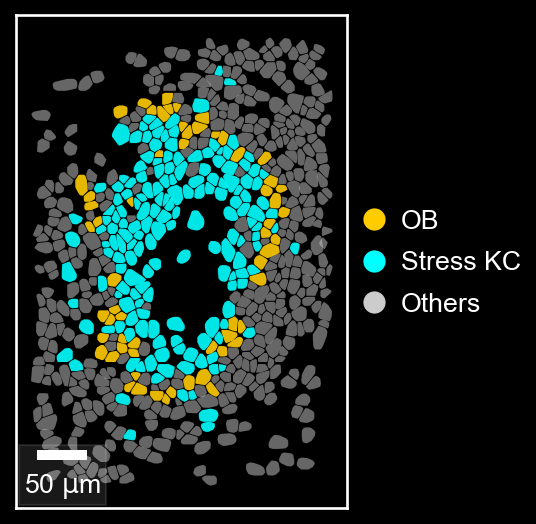

In [19]:
with mpl.style.context('dark_background'):
    ax = dimplot(zone_adata, background=True, reduction='contour',groupby='subtype', order=['OB','Stress KC'],  palette=['#FFCC00','#00FFFF'])
    draw_scalebar(ax=ax, color='white', location='lower left')
    sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)

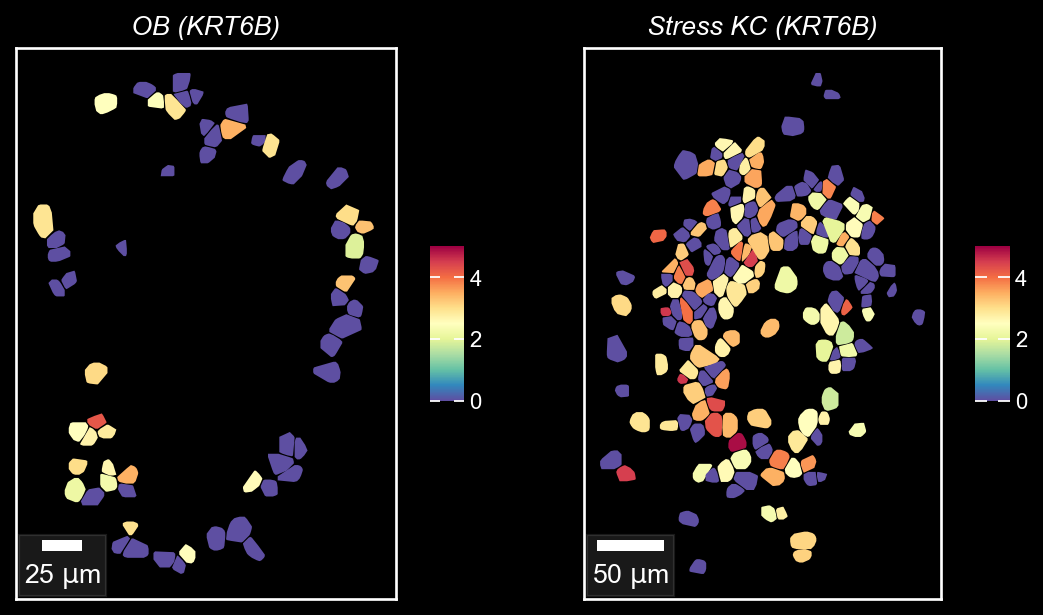

In [20]:
with mpl.style.context('dark_background'):
    fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(8, 4))    
    for i, gene in enumerate(KC_subtypes):   
        ax = axs[i]        
        ax = featureplot(zone_adata[zone_adata.obs['subtype'] == KC_subtype[i] ], ['KRT6B'], style='dark_background', reduction='contour',  vmax=5, ax=ax)
        draw_scalebar(ax=ax, color='white', location='lower left')
        ax.set_title(f"{KC_subtype[i]} (KRT6B)", fontsize=12)  
        sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)

## Fig.S6I

In [22]:
SLE2_adata.obs['type'] = SLE2_adata.obs.apply(lambda x: x['subtype'] if 'Keratinocytes' in x['celltype'] else x['celltype'], axis=1)

[23:01:35] 📃  add palette for `type` to adata.uns                                           ]8;id=625702;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=123960;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

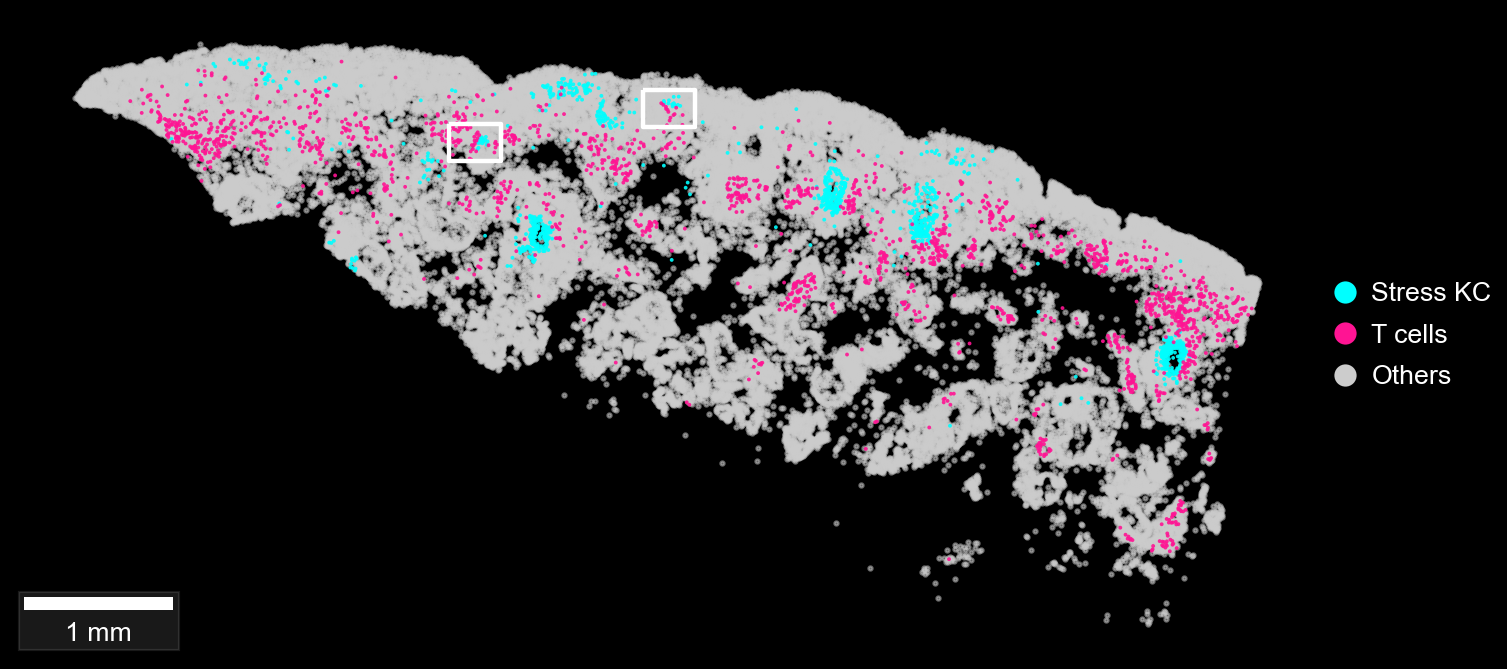

In [31]:
polygons = [
    Polygon([[14800, 17300], [15500, 17300], [15500, 16800], [14800, 16800]]),
    Polygon([[17400, 17750], [18100, 17750], [18100, 17250], [17400, 17250]])
]

with mpl.style.context('dark_background'):
    ax = dimplot(SLE2_adata, background=True, groupby='type', reduction="spatial", dot_size=50, order=['Stress KC','T cells'], height=10,palette=['#00FFFF', '#FF1493'])
    draw_scalebar(ax=ax, color='white', location='lower left')
    gpd.GeoSeries(polygons).plot(ax=ax, edgecolor='white',facecolor='none', linewidth=2)

[23:05:44] 📃  Filtering contour within bounding box [14800, 16800, 15500, 17300]            ]8;id=239677;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=974056;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#2653\2653]8;;\

[23:05:45] 📃  add palette for `type` to adata.uns                                           ]8;id=471793;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=542081;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

           📃  Filtering contour within bounding box [17400, 17250, 18100, 17750]            ]8;id=977956;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=689155;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#2653\2653]8;;\

           📃  add palette for `type` to adata.uns                                           ]8;id=4990;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=166612;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

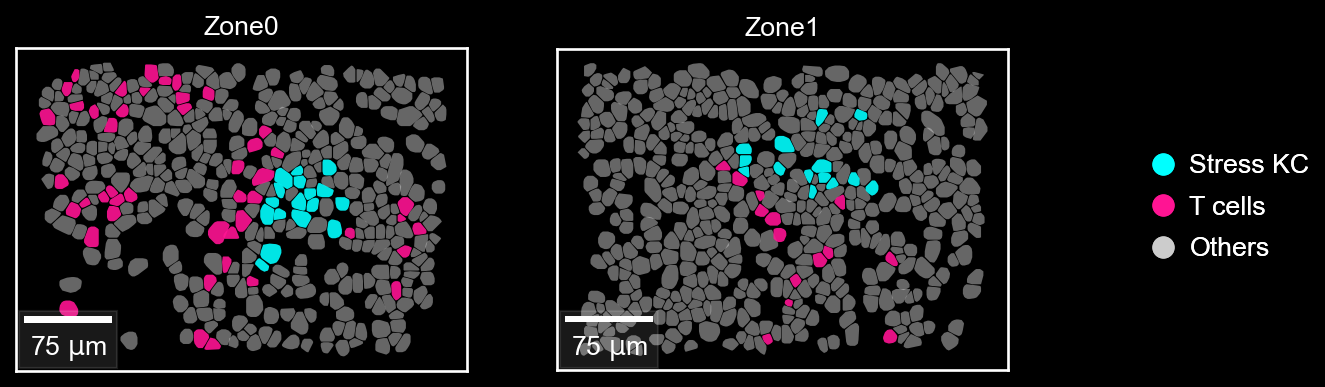

In [34]:
zones = [[14800,16800,15500,17300], [17400,17250,18100,17750]]
with mpl.style.context('dark_background'):
    fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(8, 4))    
    for i, zone in enumerate(zones):   
        ax = axs[i]  
        zone_adata = within(SLE2_adata, zone, reduction='contour', inplace=True)
        ax = dimplot(zone_adata, background=True, groupby='type', reduction="contour",  order=['Stress KC','T cells'], palette=['#00FFFF', '#FF1493'], ax=ax)
        draw_scalebar(ax=ax, color='white', location='lower left')
        ax.set_title(f"Zone{i}", fontsize=12)  
        sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)

## Fig.S6K

In [35]:
Hallmark_gene = pd.read_csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Database/Hallmark_Database//Human_hallmark_gene_sets_v2023.2.csv")
APOPTOSIS_gene = Hallmark_gene[Hallmark_gene['HallmarkName'] == 'HALLMARK_ADIPOGENESIS']

[23:40:23] ❕  ssat is not registered, register now                                           ]8;id=197327;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=577880;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[23:40:24] ❕  ssat is not registered, register now                                           ]8;id=34028;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=384702;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[23:40:25] ❕  ssat is not registered, register now                                           ]8;id=920535;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=565385;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

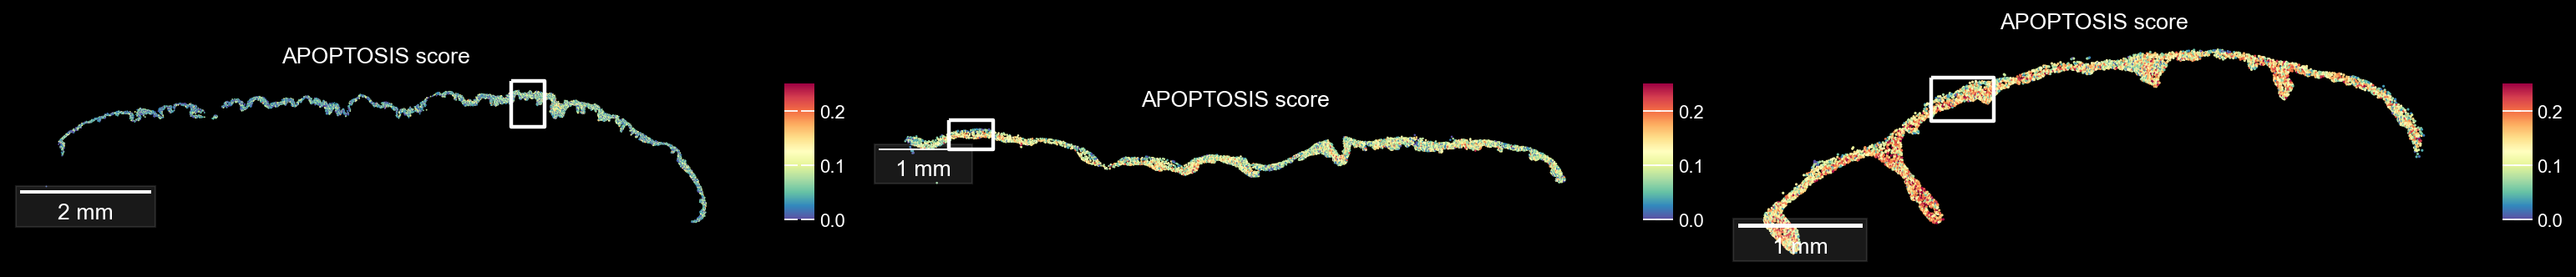

In [61]:
polygons = {
    "HC3": [Polygon([[2000, -12900], [3000, -12900], [3000, -14300], [2000, -14300]])],
    "DLE4": [Polygon([[6500, 17500], [7500, 17500], [7500, 16850], [6500, 16850]])],
    "SLE5": [Polygon([[9500,-14800], [10500,-14800],[10500,-15500], [9500,-15500]])]
}


rows, cols = 1, 3
fig = None
axs = None
plot_count = 0

samples = ["HC3","DLE4","SLE5"]
with mpl.style.context('dark_background'):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(20, 4))    
    for i in range(len(samples)):
        ax = axs[i]
        sample_adata = ST_adata[(ST_adata.obs['sample'] == samples[i]) & (ST_adata.obs['Region'] == 'Epi')]
        sc.tl.score_genes(sample_adata, APOPTOSIS_gene['Genesymbol'], score_name ='APOPTOSIS_score', ctrl_size=100)
        
        ax = featureplot(sample_adata, features='APOPTOSIS_score', reduction='spatial', dot_size=200, height=5, vmin = 0, vmax = 0.25,  ax=ax, style='dark_background')
        draw_scalebar(ax=ax, color='white', location='lower left')
        ax.set_title(f"APOPTOSIS score", fontsize=12)
        for polygon in polygons[samples[i]]:
            gpd.GeoSeries(polygon).plot(ax=ax, edgecolor='white',facecolor='none', linewidth=2) #linestyle='--',
    #save_fig("../../figures/Cellbin_APOPTOSIS_score_spatial_whole.pdf")

[23:40:17] 📃  Filtering spatial within bounding box [2000, -14300, 3000, -12900]            ]8;id=793727;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=522713;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=36259;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=133564;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[23:40:18] 📃  Filtering spatial within bounding box [6500, 16950, 7500, 17350]              ]8;id=100140;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=489978;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=43552;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=747141;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           📃  Filtering spatial within bounding box [9500, -15500, 10500, -14800]           ]8;id=900837;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=940835;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#2653\2653]8;;\

           📃  flipping contour along y axis                                                 ]8;id=657532;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=477497;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#2287\2287]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=676536;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=565558;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

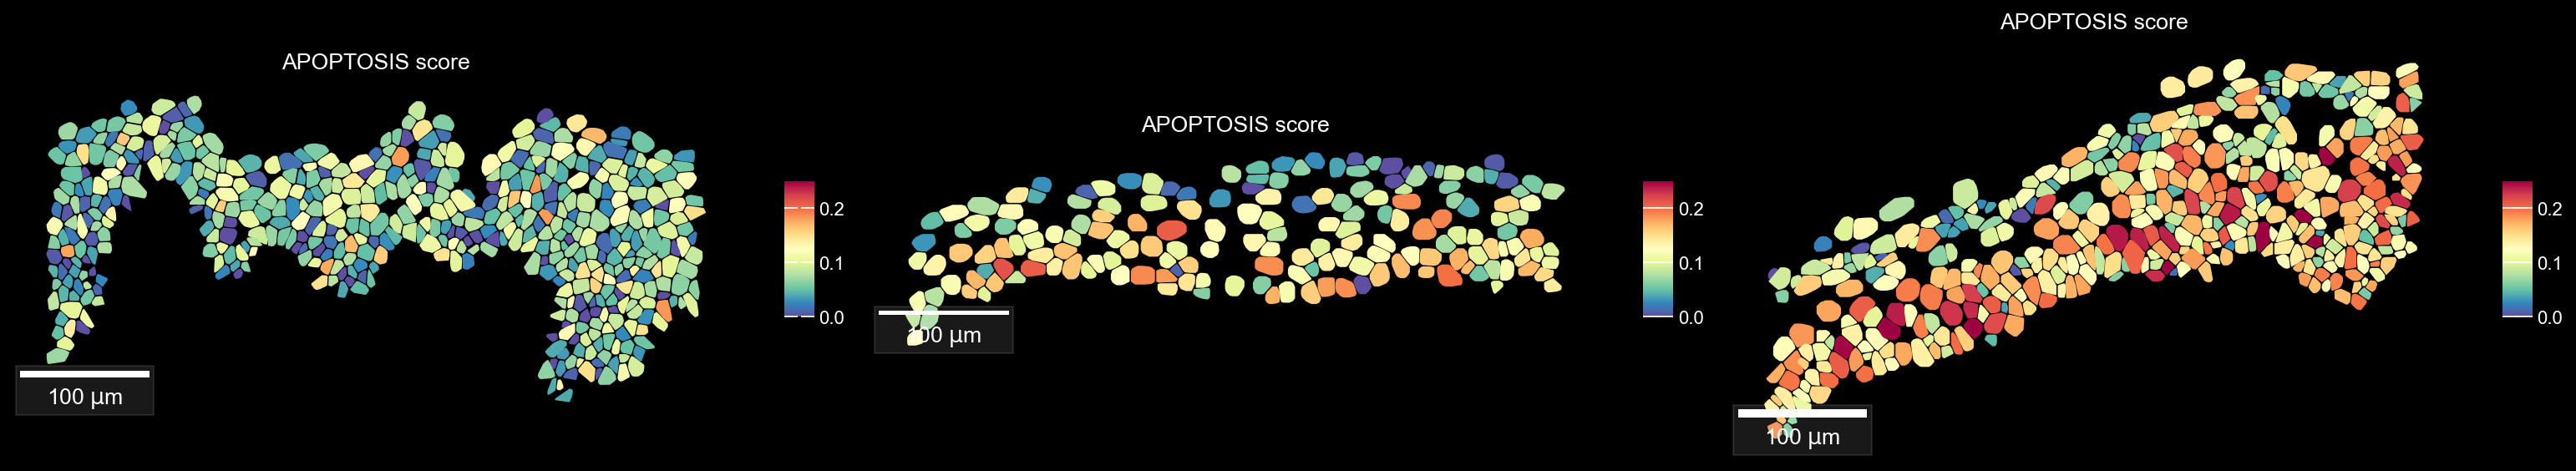

In [60]:
zone = {
'HC3' : [2000,-14300,3000,-12900],
'DLE4' : [6500,16950,7500,17350],
'SLE5' : [9500,-15500,10500,-14800]
}

rows, cols = 1, 3
fig = None
axs = None
plot_count = 0

samples = ["HC3","DLE4","SLE5"]
with mpl.style.context('dark_background'):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(20, 4)) 
    for i in range(len(samples)):
        ax = axs[i]
        sample_adata = ST_adata[(ST_adata.obs['sample'] == samples[i]) & (ST_adata.obs['Region'] == 'Epi')]
        sc.tl.score_genes(sample_adata, APOPTOSIS_gene['Genesymbol'], score_name ='APOPTOSIS_score', ctrl_size=100)
    
        zone_adata = within(sample_adata, zone[samples[i]], reduction='spatial', inplace=True)
    
        if samples[i] == "DLE2" or samples[i] == "SLE3":
            rotate(zone_adata, 90, reduction='contour', inplace=True)
        if samples[i] == "DLE5" or samples[i] == "SLE4":
            rotate(zone_adata, -90, reduction='contour', inplace=True)
        if samples[i] == "HC1" or samples[i] == "SLE5" or samples[i] == 'SLE6' or samples[i] == "HC4":
            flip(zone_adata, axis='y', reduction='contour', inplace=True)
        if samples[i] == "HC3":
            rotate(zone_adata, -145, reduction='contour', inplace=True)
        
        ax = featureplot(zone_adata, features='APOPTOSIS_score', reduction='contour', dot_size=100,vmin = 0, vmax = 0.25,  ax=ax, style='dark_background')
        draw_scalebar(ax=ax, color='white', location='lower left')
        ax.set_title("APOPTOSIS score", fontsize=12)
        #sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)
    #save_fig("../../figures/Cellbin_APOPTOSIS_score_spatial_part.pdf")